### Chapter 3

In [65]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score as acs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import export_graphviz as eg
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc

##### iris dataset

In [2]:
iris = ds.load_iris()

In [15]:
type(iris)

sklearn.utils.Bunch

In [28]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
iris.target.shape

(150,)

In [30]:
# iris description

iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [31]:
X = iris.data
y = iris.target

print('Class Lebels', np.unique(y))

Class Lebels [0 1 2]


### Lets Split The Dataset

In [32]:
X_train, X_test, y_train, y_test = tts(X,y, random_state=1,test_size = .25, stratify = y)

In [33]:
print('labels counts in y', np.bincount(y))
print('labels counts in y_train', np.bincount(y_train))
print('labels counts in y_test', np.bincount(y_test))

labels counts in y [50 50 50]
labels counts in y_train [38 37 37]
labels counts in y_test [12 13 13]


In [38]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 123)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
y_pred = ppn.predict(X_test_std)

In [41]:
y_pred

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2])

In [42]:
print('Missclassified samples : %d ' % (y_test != y_pred).sum())

Missclassified samples : 1 


In [43]:
print('accuracy rate :' ,  acs(y_test,y_pred)*100)

accuracy rate : 97.36842105263158


### Lets try again

In [9]:
Xtest, Xtrain, ytest, ytrain = tts(X,y, test_size = .25, random_state = 123, stratify = y)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Xtrain)
XtrainStd = sc.transform(Xtrain)
XtestStd = sc.transform(Xtest)

In [11]:
ppn = Perceptron(max_iter=40, eta0 = 0.1, random_state=123)
ppn.fit(XtrainStd, ytrain)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
y_pred = ppn.predict(XtestStd)
print('Missclassified: %d ' % (ytest != y_pred).sum())

Missclassified: 8 


In [13]:
acs(y_pred, ytest)

0.9285714285714286

#### Plotting the result

In [44]:
from matplotlib.colors import ListedColormap

In [45]:
def plot_decision_regions(X, y, classifier, test_idx = None, resulation = 0.02):
    
    markers = ('s','x','o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resulation),
                           np.arange(x2_min, x2_max, resulation))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = .3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(x = X[y==cl,0], y = X[y == cl, 1],
                   alpha = .8, c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolors= 'black')
        
    if test_idx:
        Xtest, ytest = X[test_idx, :], y[test_idx]
        
        plt.scatter(Xtest[:, 0], Xtest[:, 1],
                   c= '',
                   edgecolor= 'black',alpha = 1,
                   linewidth= 1, marker = 'o',
                   s = 100, label =  'test set')

In [46]:
X_combined_std = np.vstack((XtrainStd, XtestStd))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X= X_combined_std,
                     y= y_combined,
                     classifier = ppn,
                     test_idx = range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

ValueError: X has 2 features per sample; expecting 4

###### fix it later

### Logistic regression

##### law or equation of phi(z)

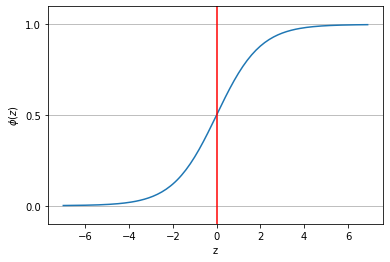

In [55]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

z = np.arange(-7,7,.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0, color = 'red')
plt.ylim(-.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0,.5,1])
ax = plt.gca()
ax.yaxis.grid(True)

plt.show()   

#### Logistic Regression Module

In [58]:
class LogisticRegressionGD(object):
    
    def __init__(self, eta, max_iter, random_state):
        
        
    def fit(self, X , y):
        
        
    def net_input(self, X):
        
        
    def activation(self, z):
       
    
    def predict(self, X)
    

IndentationError: expected an indented block (<ipython-input-58-dad32626a47f>, line 6)

#### With Scikit learn

In [67]:
lr = LogisticRegression(C = 100, random_state= 123)
lr.fit(XtrainStd, ytrain)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
plot_decision_regions(X_combined_std, y_combined, classifier= lr, test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc= 'upper left')
plt.show()

ValueError: X has 2 features per sample; expecting 4

In [69]:
lr.predict_proba(X_test_std[:3, :])

array([[4.49988683e-09, 2.13790135e-04, 9.99786205e-01],
       [9.98620644e-01, 1.37935606e-03, 2.06916815e-18],
       [9.98995564e-01, 1.00443598e-03, 5.65483598e-19]])

In [72]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis= 1)

array([2, 0, 0], dtype=int64)

In [78]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [77]:
lr.predict(X_test_std[:3,:]).reshape(-1,1)

array([[2],
       [0],
       [0]])

In [5]:
9.3 * 100/2.5

372.00000000000006